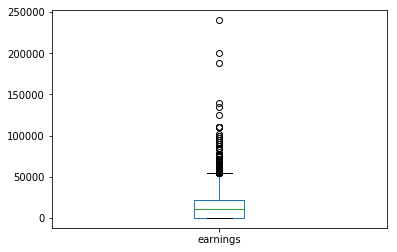

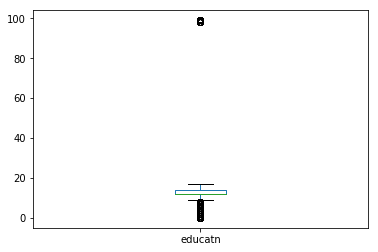

/home/binuri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


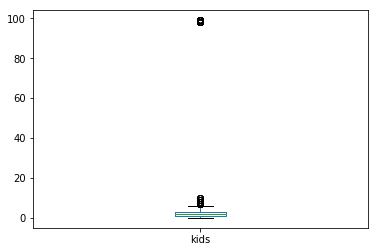

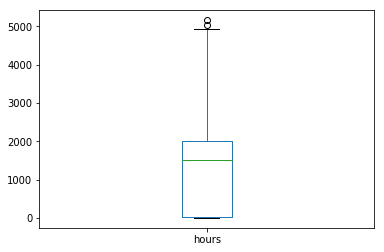

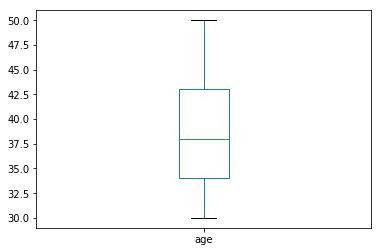

,intnum,persnum,age,educatn,earnings,hours,kids
count,4676.000000,4676.000000,4676.000000,4675.000000,4676.000000,4676.000000,4676.000000
mean,4576.639435,57.697819,38.348589,16.232299,13667.338323,1235.874465,2.129384
std,2757.683509,79.090626,5.530621,17.944309,13587.759635,933.039644,1.381058
min,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1892.750000,2.000000,34.000000,12.000000,235.500000,69.750000,1.000000
50%,5458.000000,4.000000,38.000000,12.000000,11000.000000,1520.000000,2.000000
75%,6639.000000,170.000000,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,9306.000000,200.000000,50.000000,99.000000,68000.000000,5025.000000,7.000000


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Reading data locally
df = pd.read_csv('dataSet/PSID.csv')

#get descriptive statistics
df.describe()

#to remove incomplete data from our DataFrame.
df.dropna(how='all')
df.dropna(how='any') 
#df.fillna(0)
#df = df.apply(lambda x: pd.Series(x.dropna().values))

df.describe()
#df['earnings'].plot()
#plt.show()


######################################### 
#check and view simply using a box plot to see whether there are outliers

#for earnings
plt.show(df['earnings'].plot(kind = 'box'))


#use z score method to remove outliers
arr = outliers_modified_z_score(df['earnings'])
#print(arr)


#for education attribute
plt.show(df['educatn'].plot(kind = 'box'))
arr3 = outliers_modified_z_score(df['educatn'])

#for kids attribute
plt.show(df['kids'].plot(kind = 'box'))
arr2 = outliers_modified_z_score(df['kids'])
#print(arr2)

#for hours attribute
plt.show(df['hours'].plot(kind = 'box'))

#for age attribute
plt.show(df['age'].plot(kind = 'box'))


######################################### 
#remove the outliers from data frame

df = df.set_index("Seq No")
for i in arr:
    df = df.drop(i+1, axis=0)
    
for i2 in arr2:
    df = df.drop(i2+1, axis=0)
    
for i3 in arr3:
    df = df.drop(i3+1, axis=0) 
    
    
#########################################      
#export the data into csv
df.to_csv('processed_PSID.csv', sep='\t')
df.describe()


In [62]:
#to detect whether there are outliers using z scores method
# remove data that z score is less than -3.0 and over +3.0

def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)


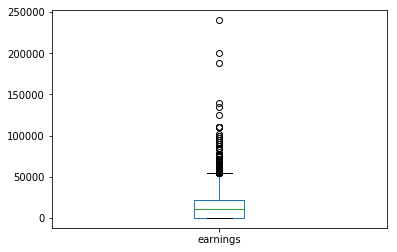

,intnum,persnum,age,educatn,earnings,hours,kids
count,4810.000000,4810.000000,4810.000000,4809.000000,4810.000000,4810.000000,4810.000000
mean,4613.845738,59.219127,38.451143,16.332502,13480.630146,1223.339501,4.512682
std,2759.003050,79.752339,5.595928,18.421492,13573.684366,940.980015,14.954980
min,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1914.250000,2.000000,34.000000,12.000000,0.000000,16.000000,1.000000
50%,5489.000000,4.000000,38.000000,12.000000,10750.000000,1500.000000,2.000000
75%,6673.500000,170.000000,43.000000,14.000000,22000.000000,1993.750000,3.000000
max,9306.000000,205.000000,50.000000,99.000000,68000.000000,5160.000000,99.000000
